In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"desing","key":"9d4fc59b6348ff4a010637adf0348d1a"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d muhammadjawwadismail/hr-competency-scores-for-screening

  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 29.5MB/s]


In [5]:
!mkdir hr-competency-scores-for-screening
!unzip hr-competency-scores-for-screening.zip -d hr-competency-scores-for-screening
!ls hr-competency-scores-for-screening

Archive:  hr-competency-scores-for-screening.zip
  inflating: hr-competency-scores-for-screening/dataset.csv  
dataset.csv


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/hr-competency-scores-for-screening/dataset.csv')

In [8]:
df.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


In [9]:
df.shape

(300, 10)

In [12]:
df['call_for_interview'].value_counts()

1    159
0    141
Name: call_for_interview, dtype: int64

In [13]:
df.columns

Index(['years_of_experience', 'functional_competency_score',
       'top1_skills_score', 'top2_skills_score', 'top3_skills_score',
       'behavior_competency_score', 'top1_behavior_skill_score',
       'top2_behavior_skill_score', 'top3_behavior_skill_score',
       'call_for_interview'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

years_of_experience            0
functional_competency_score    0
top1_skills_score              0
top2_skills_score              0
top3_skills_score              0
behavior_competency_score      0
top1_behavior_skill_score      0
top2_behavior_skill_score      0
top3_behavior_skill_score      0
call_for_interview             0
dtype: int64

<Axes: >

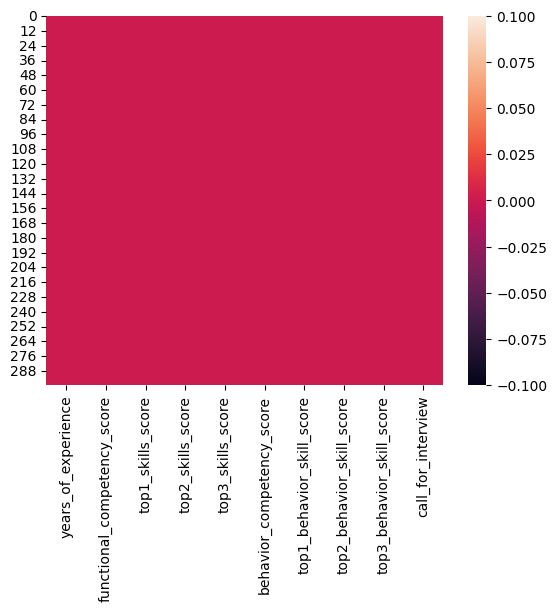

In [35]:
sns.heatmap(df.isnull())

<Axes: >

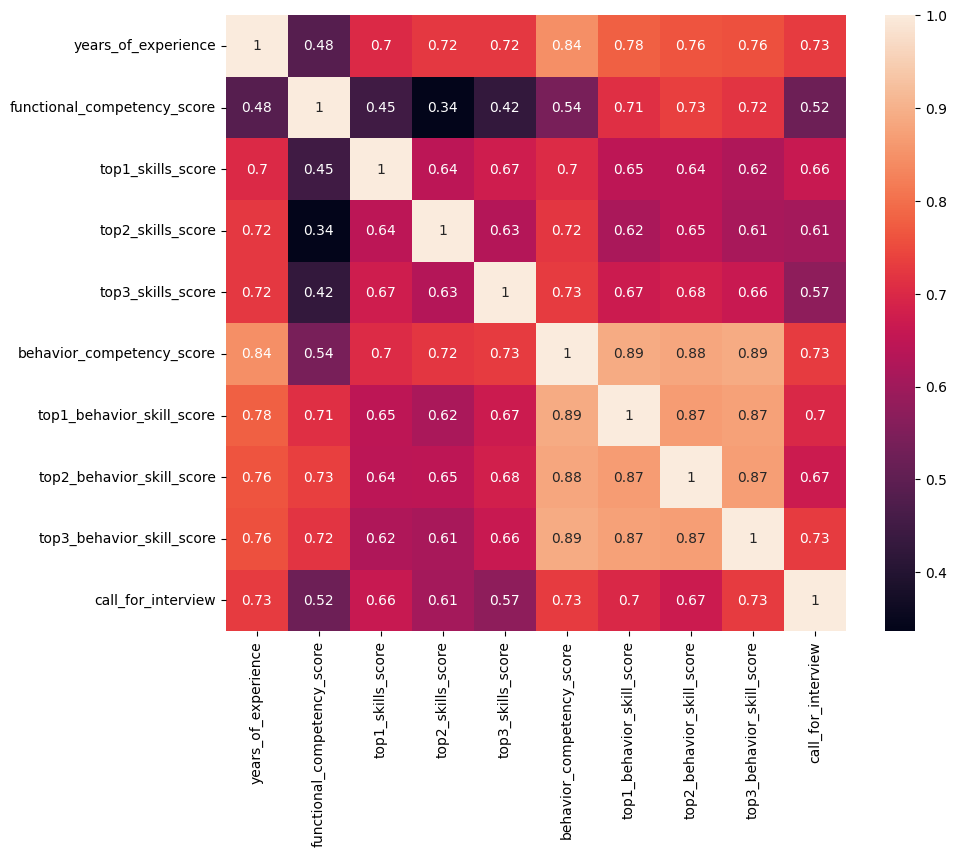

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

([<matplotlib.patches.Wedge at 0x7b6a18f628c0>,
 [Text(-0.10351904621929765, 1.095118170367859, '1'),
  Text(0.10351894368693447, -1.0951181800600067, '0')],
 [Text(-0.05646493430143508, 0.597337183837014, '53%'),
  Text(0.056464878374691524, -0.59733718912364, '47%')])

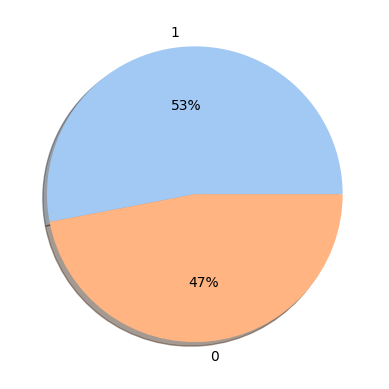

In [14]:
palette_color = sns.color_palette('pastel')
plt.pie(x = df['call_for_interview'].value_counts(),
            labels=df['call_for_interview'].value_counts().index,
            autopct='%.0f%%',
            shadow=True,
            colors= palette_color)

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

In [15]:
X = df.drop (columns='call_for_interview', axis=1)
Y = df['call_for_interview']

In [16]:
print(X)

     years_of_experience  functional_competency_score  top1_skills_score  \
0               0.333333                     0.749498           0.777778   
1               0.133333                     0.490638           0.777778   
2               0.000000                     0.460256           0.444444   
3               0.000000                     0.507347           0.555556   
4               0.400000                     0.662020           0.666667   
..                   ...                          ...                ...   
295             0.000000                     0.576078           0.555556   
296             0.000000                     0.587738           0.555556   
297             0.400000                     0.740044           0.666667   
298             0.333333                     0.654656           0.666667   
299             0.600000                     0.754280           0.222222   

     top2_skills_score  top3_skills_score  behavior_competency_score  \
0              

In [17]:
print(Y)

0      1
1      0
2      0
3      0
4      1
      ..
295    0
296    1
297    1
298    1
299    1
Name: call_for_interview, Length: 300, dtype: int64


In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X)

StandardScaler()

In [20]:
standarized_data = scaler.transform(X)

In [21]:
print(standarized_data)

[[ 0.42618231  1.09344146  0.40683087 ...  1.85052793  1.00808787
   1.31407962]
 [-0.41312639 -0.56037812  0.40683087 ... -0.52865659 -1.34155254
  -0.44339269]
 [-0.97266553 -0.7544858  -0.99603421 ... -1.75908195 -1.52988156
  -0.69374929]
 ...
 [ 0.70595187  1.03304546 -0.06079082 ...  0.82523529  0.56805549
   1.02735375]
 [ 0.42618231  0.48750804 -0.06079082 ...  0.42811285  0.50704292
   0.95401565]
 [ 1.54526058  1.12399439 -1.9312776  ...  1.87049393  1.58981584
   1.17879425]]


In [22]:
X = standarized_data
Y = df['call_for_interview']

In [23]:
print(X)
print(Y)

[[ 0.42618231  1.09344146  0.40683087 ...  1.85052793  1.00808787
   1.31407962]
 [-0.41312639 -0.56037812  0.40683087 ... -0.52865659 -1.34155254
  -0.44339269]
 [-0.97266553 -0.7544858  -0.99603421 ... -1.75908195 -1.52988156
  -0.69374929]
 ...
 [ 0.70595187  1.03304546 -0.06079082 ...  0.82523529  0.56805549
   1.02735375]
 [ 0.42618231  0.48750804 -0.06079082 ...  0.42811285  0.50704292
   0.95401565]
 [ 1.54526058  1.12399439 -1.9312776  ...  1.87049393  1.58981584
   1.17879425]]
0      1
1      0
2      0
3      0
4      1
      ..
295    0
296    1
297    1
298    1
299    1
Name: call_for_interview, Length: 300, dtype: int64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(300, 9) (240, 9) (60, 9)


In [26]:
classifier = svm.SVC(kernel='linear')

In [27]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [28]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.9291666666666667


In [30]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.9666666666666667


In [32]:
input_data = (0.333333, 0.749498, 0.777778, 0.7, 0.8, 0.769231, 0.931689, 0.662042, 0.752463)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshape)
print(prediction)
print()

if (prediction[0] == 0):
    print('Kandidat Tidak Dipanggil Untuk Interview')
else :
    print('Kandidat dipanggil Untuk Interview')

[1]

Kandidat dipanggil Untuk Interview


In [33]:
import pickle

In [34]:
pickle.dump(classifier, open("klasifikasi_interview.sav",'wb'))